Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} )
sess = tf.compat.v1.Session(config=config)
# tf.keras.backend.set_session(sess)

from keras import backend as K
K.tensorflow_backend.set_session(sess)

# f config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) sess = tf.compat.v1.Session(config=config) keras.backend.set_session(sess)

AttributeError: ignored


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Conv2D,Dropout,Dense,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/experiments/melanoma_assignment/data/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/experiments/melanoma_assignment/data/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels ="inferred",
    label_mode ="categorical",
    # batch_size=batch_size,
    image_size = (img_height,img_width),
    validation_split=0.20,
    subset = "training",
    color_mode ="rgb",
    seed=123
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode ="categorical",
    # batch_size=batch_size,
    image_size=(img_height,img_width),
    color_mode ="rgb",
    seed=123,
    validation_split = 0.20,
    subset ="validation"
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

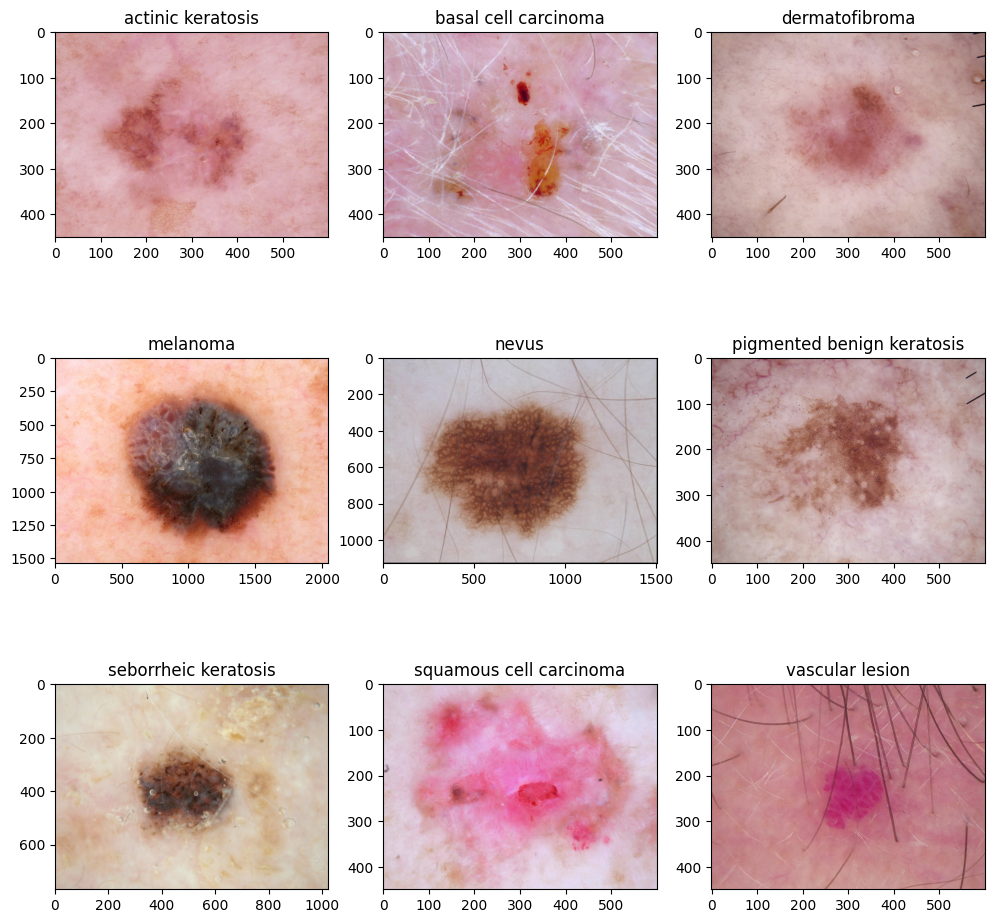

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(12,12))
for i in range(9):
  plt.subplot(3,3,i+1)
  image_ = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image_)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:


# we need to add rescaling the model into (0,1) for that we need to import rescaling from keras and then proceed further.


### Your code goes here


input_shape = (img_height,img_width,3)
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./180,input_shape=input_shape)])
#     layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
#     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dense(128,activation="relu"),
#     layers.Dense(len(class_names),activation="softmax")
# ])

model.add(Conv2D(32,kernel_size=(3,3),activation ="relu",input_shape = input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(len(class_names),activation="Softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 495616)            0         
                                                                 
 dense (Dense)               (None, 128)               63438976  
                                                        

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 495616)            0         
                                                                 
 dense (Dense)               (None, 128)               63438976  
                                                        

### Train the model

In [ ]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 332s 2s/step - loss: 7.4732 - accuracy: 0.2305 - val_loss: 1.9073 - val_accuracy: 0.2908
Epoch 2/20
56/56 [==============================] - 4s 71ms/step - loss: 1.8034 - accuracy: 0.3504 - val_loss: 1.6984 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 4s 68ms/step - loss: 1.5359 - accuracy: 0.4922 - val_loss: 1.5535 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: 1.2713 - accuracy: 0.5898 - val_loss: 1.5595 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 4s 69ms/step - loss: 1.0311 - accuracy: 0.6557 - val_loss: 1.6765 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 4s 67ms/step - loss: 0.8071 - accuracy: 0.7372 - val_loss: 2.1157 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 0.6102 - accuracy: 0.8142 - val_loss: 1.8827 - val_accuracy: 0.4966
Epoch 8/20
56

 we could see the accuracy is 92% when we use 2 convultion layer and 1 max pooiling layer  but the Validation accuracy is very very low only 50% so we could add some other convolution layers and maxpooling layer and increase the Feature map and look at the result and then we can proceed further

In [ ]:


input_shape = (img_height,img_width,3)
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./180,input_shape=input_shape)])

model.add(Conv2D(32,kernel_size=(3,3),activation ="relu",input_shape = input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(Conv2D(128,kernel_size=(3,3),activation="relu")),
model.add(Conv2D(256,kernel_size=(3,3),activation="relu")),
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(len(class_names),activation="Softmax"))

model.summary()

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data= val_ds

)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 88, 88, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 86, 86, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 84, 84, 256)       295168    
                                                      

### Visualizing training results

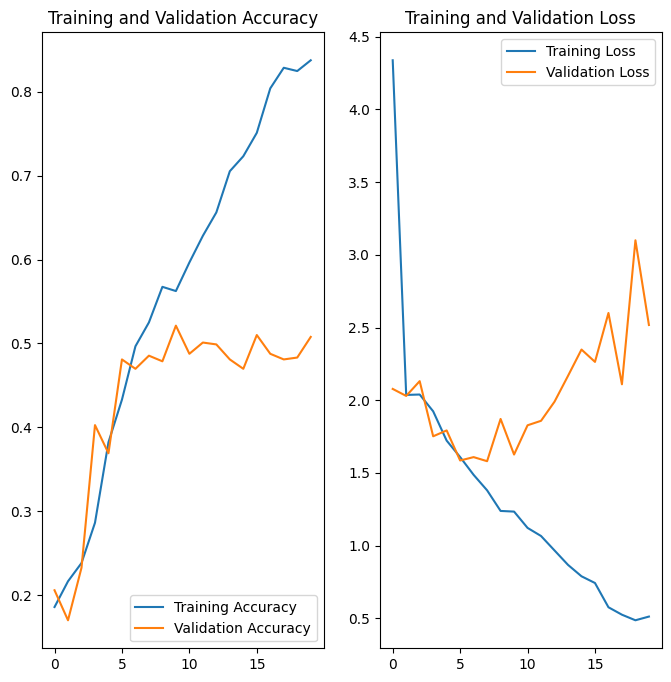

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- When considering the base model we could see the accurray is close to 90% but the Validation accuracy is very minimal so this model is definetly overfitting.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

## doing augmentation to the data

agumented_data = Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

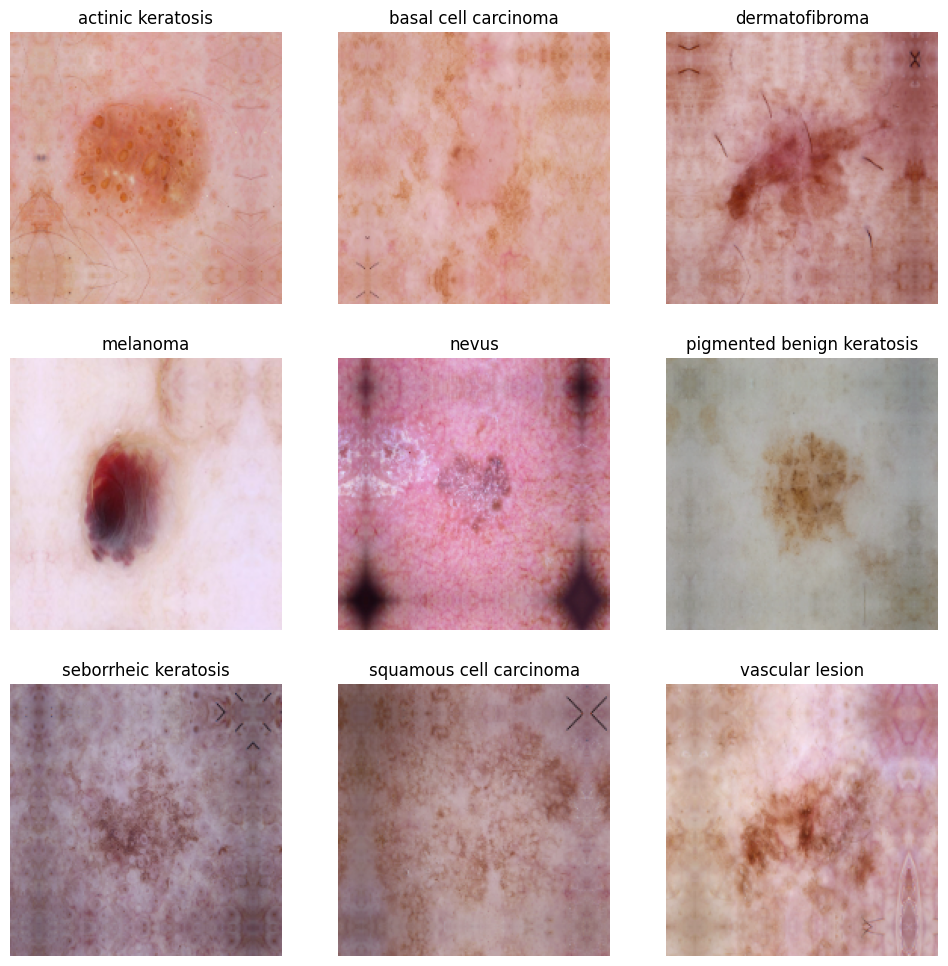

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(agumented_data(images)[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# we try to add the dropout layer after every convolutional layer after maxpooling
model = tf.keras.Sequential(
    [
       agumented_data,layers.experimental.preprocessing.Rescaling(1./255,input_shape =(180,180,3))
    ]
)
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(1024,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(len(class_names),activation="softmax"))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 88, 88, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 88, 88, 64)        0         
                                                      

### Compiling the model

In [ ]:
## Your code goes here

model.compile(
    loss=tf.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs= 20
)

Epoch 1/20
56/56 [==============================] - 29s 432ms/step - loss: 2.8680 - accuracy: 0.1998 - val_loss: 2.0369 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 26s 436ms/step - loss: 2.0272 - accuracy: 0.2037 - val_loss: 2.0259 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 26s 428ms/step - loss: 2.0268 - accuracy: 0.2031 - val_loss: 2.0299 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 26s 441ms/step - loss: 2.0254 - accuracy: 0.2020 - val_loss: 2.0256 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 28s 445ms/step - loss: 2.0336 - accuracy: 0.1987 - val_loss: 2.0361 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 27s 442ms/step - loss: 2.0231 - accuracy: 0.2054 - val_loss: 2.0333 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 27s 446ms/step - loss: 2.0120 - accuracy: 0.2199 - val_loss: 2.0419 - val_accuracy: 0.2036

### Visualizing the results

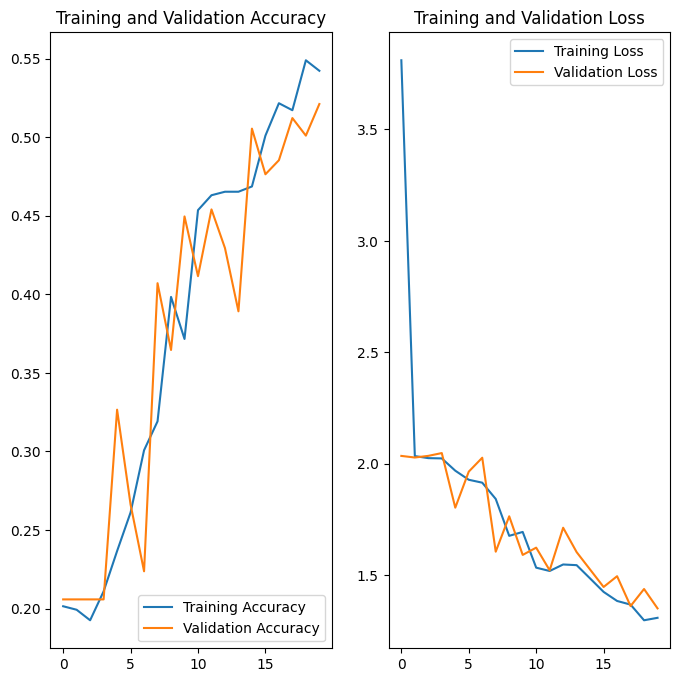

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- when compared to the previous model while we add dropouts we can see there is no overfitting but also the accuracy of the model is total disaster we have below 50% accuracy in the model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/experiments/melanoma_as...,actinic keratosis
1,/content/drive/MyDrive/experiments/melanoma_as...,actinic keratosis
2,/content/drive/MyDrive/experiments/melanoma_as...,actinic keratosis
3,/content/drive/MyDrive/experiments/melanoma_as...,actinic keratosis
4,/content/drive/MyDrive/experiments/melanoma_as...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/experiments/melanoma_as...,vascular lesion
2235,/content/drive/MyDrive/experiments/melanoma_as...,vascular lesion
2236,/content/drive/MyDrive/experiments/melanoma_as...,vascular lesion
2237,/content/drive/MyDrive/experiments/melanoma_as...,vascular lesion


<BarContainer object of 9 artists>

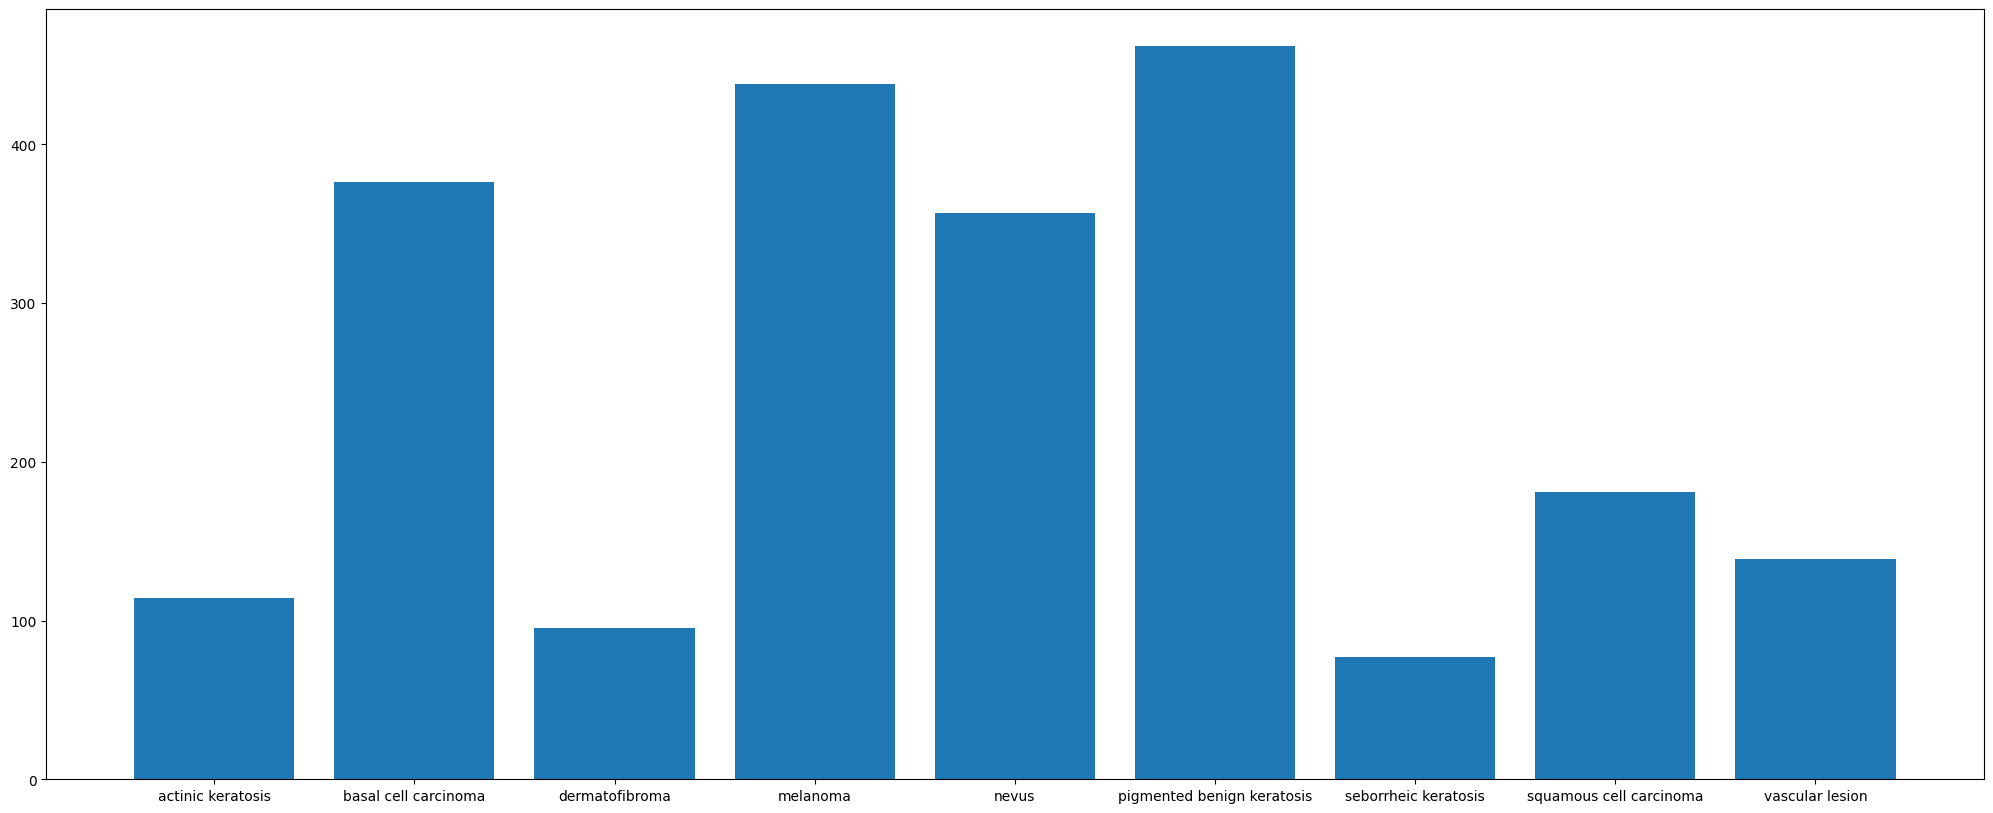

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


- we can see the class Seborrheic keratosis is having low numbers when compared to the others.

- Pigmentes benign Keratosis is the one which dominates the data


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/drive/MyDrive/experiments/melanoma_assignment/data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF8EA617310>: 100%|██████████| 500/500 [00:18<00:00, 26.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF8EA616D70>: 100%|██████████| 500/500 [00:18<00:00, 27.37 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF8EA6844F0>: 100%|██████████| 500/500 [00:17<00:00, 28.66 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF8F42F1120>: 100%|██████████| 500/500 [01:23<00:00,  5.97 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7AF8EA49F310>: 100%|██████████| 500/500 [01:16<00:00,  6.56 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF8EA6172E0>: 100%|██████████| 500/500 [00:20<00:00, 23.92 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AF8F435AD40>: 100%|██████████| 500/500 [00:36<00:00, 13.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AF8F4373430>: 100%|██████████| 500/500 [00:16<00:00, 29.47 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/experiments/melanoma_assignment/data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AF8F435B040>: 100%|██████████| 500/500 [00:20<00:00, 24.25 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [ ]:
from glob import glob
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-19-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [16]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [17]:
data_dir_train=data_dir_train
# "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(180, 180),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(180, 180),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [19]:
## your code goes here

# here we will add the VGG19 architecture and see the results

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))
])

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.2

#-------------------------------------------------
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.25))
#--------------------------------------------------
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))

# -------------------------------------------------
# --------------------------------------------------

# model.add(Conv2D(256,(3,3),activation="relu"))
# model.add(Conv2D(256,(3,3),activation="relu"))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256,activation="relu"))
# model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(len(class_names),activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 176, 176, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 58, 58, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [20]:
## your code goes here

model.compile(
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001),
    metrics=["accuracy"]
)

#### **Todo:**  Train your model

In [21]:
%%time
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 52s 225ms/step - loss: 5.1977 - accuracy: 0.0927 - val_loss: 2.2749 - val_accuracy: 0.1566
Epoch 2/30
169/169 [==============================] - 35s 201ms/step - loss: 4.9848 - accuracy: 0.1011 - val_loss: 2.3850 - val_accuracy: 0.1210
Epoch 3/30
169/169 [==============================] - 36s 204ms/step - loss: 4.8846 - accuracy: 0.0931 - val_loss: 2.5521 - val_accuracy: 0.1017
Epoch 4/30
169/169 [==============================] - 36s 207ms/step - loss: 4.8111 - accuracy: 0.0992 - val_loss: 3.2861 - val_accuracy: 0.1024
Epoch 5/30
169/169 [==============================] - 39s 228ms/step - loss: 4.6451 - accuracy: 0.1013 - val_loss: 3.9031 - val_accuracy: 0.1069
Epoch 6/30
169/169 [==============================] - 35s 202ms/step - loss: 4.5392 - accuracy: 0.1061 - val_loss: 4.0174 - val_accuracy: 0.1054
Epoch 7/30
169/169 [==============================] - 36s 207ms/step - loss: 4.4218 - accuracy: 0.1079 - val_loss: 3.9556 - val_accuracy: 0.1

#### **Todo:**  Visualize the model results

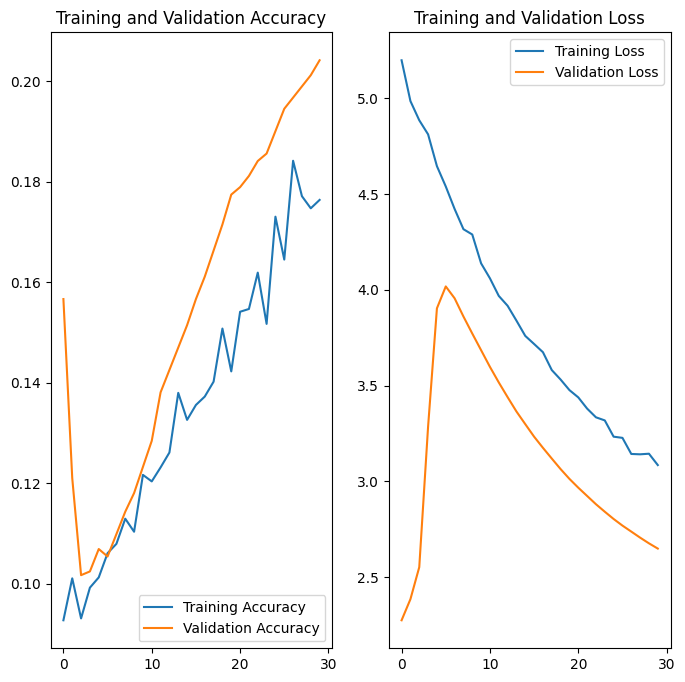

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
i =+1
model.save("/content/drive/MyDrive/experiments/melanoma_assignment/model_file_5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [24]:
! pip freeze > "/content/drive/MyDrive/experiments/melanoma_assignment/requirements.txt"

Since the accuracy is very low we are just doing some changes into the parameters and trying to rebuild the model again with Normalization

In [55]:
## your code goes here

# here we will add the VGG19 architecture and see the results

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))
])

model.add(Conv2D(32,(3,3),activation="relu"))
# model.add(Conv2D(32,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.2

#-------------------------------------------------
model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.25))
#--------------------------------------------------
model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
# -------------------------------------------------
# --------------------------------------------------

# model.add(Conv2D(256,(3,3),activation="relu"))
# model.add(Conv2D(256,(3,3),activation="relu"))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(128,activation="relu"))
# model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(len(class_names),activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 178, 178, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 57, 57, 64)       

In [56]:
## your code goes here

model.compile(
    loss=tf.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [57]:
%%time
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 38s 205ms/step - loss: 1.9869 - accuracy: 0.3325 - val_loss: 4.2110 - val_accuracy: 0.1203
Epoch 2/30
169/169 [==============================] - 34s 195ms/step - loss: 1.4654 - accuracy: 0.4607 - val_loss: 3.3981 - val_accuracy: 0.1863
Epoch 3/30
169/169 [==============================] - 35s 202ms/step - loss: 1.3035 - accuracy: 0.5156 - val_loss: 1.3386 - val_accuracy: 0.5115
Epoch 4/30
169/169 [==============================] - 39s 226ms/step - loss: 1.1656 - accuracy: 0.5640 - val_loss: 1.2165 - val_accuracy: 0.5345
Epoch 5/30
169/169 [==============================] - 34s 197ms/step - loss: 1.0615 - accuracy: 0.6070 - val_loss: 1.5071 - val_accuracy: 0.4892
Epoch 6/30
169/169 [==============================] - 36s 207ms/step - loss: 0.9897 - accuracy: 0.6194 - val_loss: 8.3798 - val_accuracy: 0.1849
Epoch 7/30
169/169 [==============================] - 34s 197ms/step - loss: 0.9062 - accuracy: 0.6563 - val_loss: 1.9147 - val_ac

We are trying without Normalization

In [52]:
## your code goes here

# here we will add the VGG19 architecture and see the results

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3))
])

model.add(Conv2D(32,(3,3),activation="relu"))
# model.add(Conv2D(32,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.2

#-------------------------------------------------
model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.25))
#--------------------------------------------------
model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
# -------------------------------------------------
# --------------------------------------------------
model.add(Flatten())

model.add(Dense(128,activation="relu"))
# model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(len(class_names),activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 19, 19, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 17, 128)      

In [53]:

model.compile(
    loss=tf.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [54]:
%%time
epochs = 20
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 37s 202ms/step - loss: 1.8962 - accuracy: 0.2819 - val_loss: 1.7529 - val_accuracy: 0.3460
Epoch 2/20
169/169 [==============================] - 38s 220ms/step - loss: 1.5799 - accuracy: 0.3891 - val_loss: 1.4401 - val_accuracy: 0.4477
Epoch 3/20
169/169 [==============================] - 33s 193ms/step - loss: 1.4496 - accuracy: 0.4455 - val_loss: 1.2848 - val_accuracy: 0.5122
Epoch 4/20
169/169 [==============================] - 38s 220ms/step - loss: 1.3738 - accuracy: 0.4690 - val_loss: 1.2565 - val_accuracy: 0.5330
Epoch 5/20
169/169 [==============================] - 47s 274ms/step - loss: 1.2950 - accuracy: 0.4902 - val_loss: 1.1849 - val_accuracy: 0.5301
Epoch 6/20
169/169 [==============================] - 37s 215ms/step - loss: 1.2691 - accuracy: 0.5204 - val_loss: 1.1605 - val_accuracy: 0.5345
Epoch 7/20
169/169 [==============================] - 33s 191ms/step - loss: 1.1702 - accuracy: 0.5475 - val_loss: 1.0461 - val_ac

In [ ]:
()